In [1]:
import pandas
pandas.__version__

'1.1.3'

In [2]:
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option("max_colwidth", 200)

import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import os.path
import fuzzywuzzy as fz
import googletrans as gtr
import translate as tr
import langdetect as ld
os.getcwd()

'C:\\Users\\ykele'

In [3]:
df1 = pd.read_csv('en_openfoodfacts_org_products.csv',sep ='\t', encoding = 'utf8')

C:\Users\ykele\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,8,13,22,23,27,28,29,31,38,47,52,55,64,75,77) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df1.shape

(1847483, 186)

In [5]:
df1.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/00000000000000225/jeunes-pousses-endives,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,NaN,NaN,NaN,NaN,endives,endives,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, e...","en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:orig...","To be completed,Nutrition fac

In [6]:
df1.isnull().sum()

code                                                0
url                                                 0
creator                                             4
created_t                                           0
created_datetime                                    0
last_modified_t                                     0
last_modified_datetime                              0
product_name                                    78987
abbreviated_product_name                      1840900
generic_name                                  1729433
quantity                                      1379053
packaging                                     1554600
packaging_tags                                1554633
packaging_text                                1842462
brands                                         892355
brands_tags                                    892414
categories                                     969704
categories_tags                                969706
categories_en               

In [7]:
df1.shape


(1847483, 186)

In [8]:
# on va réduire le jeu de données : on prend les produits qui ont plus de 20% de données.
df1['nbIndic']=df1.loc[:,'code':'carnitine_100g'].count(1)


In [9]:
# 20% de 187 : 37. On supprime les individus qui ont moins de 37 caractéristiques.

df1=df1[df1['nbIndic']>37]

In [10]:
#df1.to_csv('en_openfoodfacts_org_products_V2.csv')
df1.shape

(845819, 187)

In [12]:
df1.head()


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,nbIndic
5,0000000000100,http://world-en.openfoodfacts.org/product/0000000000100/moutarde-au-mout-de-raisin-courte-paille,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,NaN,NaN,100g,NaN,NaN,NaN,courte paille,courte-paille,"Epicerie, Condiments, Sauces, Moutardes","en:groceries,en:condiments,en:sauces,en:mustards","Groceries,Condiments,Sauces,Mustards",NaN,NaN,NaN,NaN,NaN,Delois france,fr:delois-france,fr:delois-france,NaN,NaN,NaN,NaN,NaN,NaN,courte paille,France,en:france,France,eau graines de téguments de moutarde vinaigre de vin rouge sel vin rouge sucre moût de raisin (6.2%) oignons colorants extraits de carotte et extrait de paprika huile de tournesol son de moutard...,en:mustard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,18.0,d,NaN,Fat and sauces,Dressings and sauces,"en:to-be-complet

In [13]:
df1.isna().sum()

code                                               0
url                                                0
creator                                            2
created_t                                          0
created_datetime                                   0
last_modified_t                                    0
last_modified_datetime                             0
product_name                                    3434
abbreviated_product_name                      840177
generic_name                                  732178
quantity                                      509363
packaging                                     596721
packaging_tags                                596728
packaging_text                                840844
brands                                        207611
brands_tags                                   207637
categories                                     72715
categories_tags                                72715
categories_en                                 

Protein
carbohydrate
polyunsaturated-fat_100g
vitamin C, B1, B2, B6, B9 B12, A, E
sodium, potassium, calcium et magnesium
Sugars 


In [14]:
liste=['code','url','product_name','generic_name','quantity','brands','categories','manufacturing_places','labels','emb_codes','purchase_places',
       'stores','countries','ingredients_text','allergens','traces_tags','serving_size','nutriscore_score','nutriscore_grade','pnns_groups_1','pnns_groups_2',
       'states','brand_owner','ecoscore_score_fr','ecoscore_grade_fr','main_category','image_url','image_ingredients_url','image_nutrition_url','nutrition-score-fr_100g',
       'energy-kcal_100g','energy_100g','fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','proteins_100g','sodium_100g',
       'fiber_100g','vitamin-a_100g','vitamin-c_100g','potassium_100g','calcium_100g','polyunsaturated-fat_100g',
       'vitamin-e_100g','vitamin-b1_100g','vitamin-b2_100g','vitamin-b6_100g','vitamin-b12_100g','magnesium_100g']


In [15]:
df2=df1[liste]
df2

,code,url,product_name,generic_name,quantity,brands,categories,manufacturing_places,labels,emb_codes,purchase_places,stores,countries,ingredients_text,allergens,traces_tags,serving_size,nutriscore_score,nutriscore_grade,pnns_groups_1,pnns_groups_2,states,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,image_url,image_ingredients_url,image_nutrition_url,nutrition-score-fr_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,sodium_100g,fiber_100g,vitamin-a_100g,vitamin-c_100g,potassium_100g,calcium_100g,polyunsaturated-fat_100g,vitamin-e_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-b6_100g,vitamin-b12_100g,magnesium_100g
5,0000000000100,http://world-en.openfoodfacts.org/product/0000000000100/moutarde-au-mout-de-raisin-courte-paille,moutarde au moût de raisin,NaN,100g,courte paille,"Epicerie, Condiments, Sauces, Moutardes",NaN,Delois france,NaN,NaN,courte paille,France,eau graines de téguments de moutarde vinaigre de vin rouge sel vin rouge sucre moût de raisin (6.2%) oignons colorants extraits de carotte et extrait de paprika huile de tournesol son de moutard...,en:mustard,NaN,NaN,18.0,d,Fat and sauces,Dressings and sauces,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-completed, en:expiration-date-completed, en:characteristics-to-be-completed, en:packaging-to-be-completed, en:photos-to-be-validate...",NaN,60.0,b,en:mustards,https://static.openfoodfacts.org/images/products/000/000/000/0100/front.3.400.jpg,NaN,NaN,18.0,NaN,936,8.2,2.2,29.0,22.0,5.1,1.8400,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,0000000000949,http://world-en.openfoodfacts.org/product/0000000000949/salade-de-carottes-rapees,Salade de carottes râpées,NaN,NaN,NaN,"Plats préparés, Légumes préparés, Carottes râpées, Carottes râpées assaisonnées",NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,1.0,b,Composite foods,One-dish meals,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:cate...",NaN,83.0,b,en:seasoned-shredded-carrots,https://static.openfoodfacts.org/images/products/000/000/000/0949/front_fr.4.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0949/ingredients_fr.10.400.jpg,NaN,1.0,32.0,134,0.3,0.1,5.3,3.9,0.9,0.1680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,0000000001199,http://world-en.openfoodfacts.org/product/0000000001199/solene-cereales-poulet-crous,Solène céréales poulet,NaN,NaN,CROUS,NaN,NaN,NaN,NaN,NaN,NaN,France,"antioxydant : érythorbate de sodium, colorant : caramel - origine UE), tomate 33,3%, MAYONNAISE 11,1% (huile de colza 78,9%, eau, jaunes d'OEUF 6%, vinaigre, MOUTARDE [eau, graines de MOUTARDE, se...","en:eggs,en:mustard",NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:cate...",NaN,NaN,NaN,NaN,https://static.openfoodfacts.org/images/products/000/000/000/1199/front_fr.13.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/1199/ingredients_fr.17.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/1199/nutrition_fr.14.400.jpg,NaN,219.0,916,5.9,0.5,30.3,1.7,9.7,0.1856,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,0000000001281,http://world-en.openfoodfacts.org/product/0000000001281/tarte-noix-de-coco-crous-resto,Tarte noix de coco,NaN,NaN,"Crous Resto',Crous","Tartes, Tartes sucrées, Tartes à la noix de coco",NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,14.0,d,Sugary snacks,Biscuits and cakes,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:cate...",NaN,NaN,NaN,en:coconut-pies,https://static.openfoodfacts.org/images/products/000/000/000

In [16]:
df2.isna().sum()


code                             0
url                              0
product_name                  3434
generic_name                732178
quantity                    509363
brands                      207611
categories                   72715
manufacturing_places        733078
labels                      576392
emb_codes                   749985
purchase_places             698021
stores                      648278
countries                     1105
ingredients_text            199199
allergens                   663361
traces_tags                 729136
serving_size                401822
nutriscore_score            179730
nutriscore_grade            179730
pnns_groups_1                   59
pnns_groups_2                    0
states                           0
brand_owner                 561238
ecoscore_score_fr           455552
ecoscore_grade_fr           455552
main_category                72715
image_url                   309184
image_ingredients_url       422126
image_nutrition_url 

Nutriscore : diff entre aliments positifs et négatifs

Pour le solide :
inf à -1 : A
0 à 2 : B
3 à 10 : C
11 à 18 : D
Plus de 19 : E

Pour le liquide : 
eaux : A
inf à 1 : B
2 à 5 : C
6 à 9 : D
Plus de 10 : E

In [17]:
# par la suite, pour le Knn, on va s'appuyer sur les colonnes 
#'energy-kcal_100g','energy_100g','fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','proteins_100g','sodium_100g',
# on supprime les lignes qui ont toutes les valeurs en Nan.

df20=df2[df2.loc[:,'energy-kcal_100g':'sodium_100g'].isna().sum(axis=1)>=4]
df3=df2[~df2.isin(df20)].dropna(how='all')
#df3

liste2=list(df3.loc[:,'energy-kcal_100g':'magnesium_100g'].columns)
liste2

df3.isna().sum()

code                             0
url                              0
product_name                  3109
generic_name                711170
quantity                    507653
brands                      206662
categories                   72192
manufacturing_places        717032
labels                      562690
emb_codes                   725747
purchase_places             684655
stores                      632992
countries                      995
ingredients_text            196319
allergens                   638013
traces_tags                 702530
serving_size                375387
nutriscore_score            148417
nutriscore_grade            148417
pnns_groups_1                   58
pnns_groups_2                    0
states                           0
brand_owner                 529129
ecoscore_score_fr           444668
ecoscore_grade_fr           444668
main_category                72192
image_url                   308014
image_ingredients_url       416245
image_nutrition_url 

In [18]:
df3[liste2] = df3[liste2].replace({np.nan:0})  #refaire tourner si beug

In [19]:
df3.head(40)

,code,url,product_name,generic_name,quantity,brands,categories,manufacturing_places,labels,emb_codes,purchase_places,stores,countries,ingredients_text,allergens,traces_tags,serving_size,nutriscore_score,nutriscore_grade,pnns_groups_1,pnns_groups_2,states,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,image_url,image_ingredients_url,image_nutrition_url,nutrition-score-fr_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,sodium_100g,fiber_100g,vitamin-a_100g,vitamin-c_100g,potassium_100g,calcium_100g,polyunsaturated-fat_100g,vitamin-e_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-b6_100g,vitamin-b12_100g,magnesium_100g
5,0000000000100,http://world-en.openfoodfacts.org/product/0000000000100/moutarde-au-mout-de-raisin-courte-paille,moutarde au moût de raisin,NaN,100g,courte paille,"Epicerie, Condiments, Sauces, Moutardes",NaN,Delois france,NaN,NaN,courte paille,France,eau graines de téguments de moutarde vinaigre de vin rouge sel vin rouge sucre moût de raisin (6.2%) oignons colorants extraits de carotte et extrait de paprika huile de tournesol son de moutard...,en:mustard,NaN,NaN,18.0,d,Fat and sauces,Dressings and sauces,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-completed, en:expiration-date-completed, en:characteristics-to-be-completed, en:packaging-to-be-completed, en:photos-to-be-validate...",NaN,60.0,b,en:mustards,https://static.openfoodfacts.org/images/products/000/000/000/0100/front.3.400.jpg,NaN,NaN,18.0,0.0,936,8.20,2.20,29.00,22.00,5.10,1.840000,0.0,0.000000,0.0000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0000000000949,http://world-en.openfoodfacts.org/product/0000000000949/salade-de-carottes-rapees,Salade de carottes râpées,NaN,NaN,NaN,"Plats préparés, Légumes préparés, Carottes râpées, Carottes râpées assaisonnées",NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,1.0,b,Composite foods,One-dish meals,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:cate...",NaN,83.0,b,en:seasoned-shredded-carrots,https://static.openfoodfacts.org/images/products/000/000/000/0949/front_fr.4.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0949/ingredients_fr.10.400.jpg,NaN,1.0,32.0,134,0.30,0.10,5.30,3.90,0.90,0.168000,0.0,0.000000,0.0000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0000000001199,http://world-en.openfoodfacts.org/product/0000000001199/solene-cereales-poulet-crous,Solène céréales poulet,NaN,NaN,CROUS,NaN,NaN,NaN,NaN,NaN,NaN,France,"antioxydant : érythorbate de sodium, colorant : caramel - origine UE), tomate 33,3%, MAYONNAISE 11,1% (huile de colza 78,9%, eau, jaunes d'OEUF 6%, vinaigre, MOUTARDE [eau, graines de MOUTARDE, se...","en:eggs,en:mustard",NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:cate...",NaN,NaN,NaN,NaN,https://static.openfoodfacts.org/images/products/000/000/000/1199/front_fr.13.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/1199/ingredients_fr.17.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/1199/nutrition_fr.14.400.jpg,NaN,219.0,916,5.90,0.50,30.30,1.70,9.70,0.185600,2.8,0.000000,0.0000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,0000000001281,http://world-en.openfoodfacts.org/product/0000000001281/tarte-noix-de-coco-crous-resto,Tarte noix de coco,NaN,NaN,"Crous Resto',Crous","Tartes, Tartes sucrées, Tartes à la noix de coco",NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,14.0,d,Sugary snacks,Biscuits and cakes,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:cate...",NaN,NaN,NaN,en:coconut-pies,https://s

In [20]:
df3.isna().sum()

code                             0
url                              0
product_name                  3109
generic_name                711170
quantity                    507653
brands                      206662
categories                   72192
manufacturing_places        717032
labels                      562690
emb_codes                   725747
purchase_places             684655
stores                      632992
countries                      995
ingredients_text            196319
allergens                   638013
traces_tags                 702530
serving_size                375387
nutriscore_score            148417
nutriscore_grade            148417
pnns_groups_1                   58
pnns_groups_2                    0
states                           0
brand_owner                 529129
ecoscore_score_fr           444668
ecoscore_grade_fr           444668
main_category                72192
image_url                   308014
image_ingredients_url       416245
image_nutrition_url 

In [21]:
df3[df3['carbohydrates_100g'].isna()]


,code,url,product_name,generic_name,quantity,brands,categories,manufacturing_places,labels,emb_codes,purchase_places,stores,countries,ingredients_text,allergens,traces_tags,serving_size,nutriscore_score,nutriscore_grade,pnns_groups_1,pnns_groups_2,states,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,image_url,image_ingredients_url,image_nutrition_url,nutrition-score-fr_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,sodium_100g,fiber_100g,vitamin-a_100g,vitamin-c_100g,potassium_100g,calcium_100g,polyunsaturated-fat_100g,vitamin-e_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-b6_100g,vitamin-b12_100g,magnesium_100g


In [23]:
df3.shape
df3.to_csv('en_openfoodfacts_org_products_V3.csv')


In [24]:
df3 = pd.read_csv('en_openfoodfacts_org_products_V3.csv')

df3.rename(columns={"Unnamed: 0":"Ancien_Index"},inplace=True)


C:\Users\ykele\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [25]:


df3["Ancien_Index"] = df3["Ancien_Index"].astype('unicode')
df3["Ancien_Index"] = df3.Ancien_Index.astype(int)

df3["url"] = df3.url.astype(str)
df3["product_name"] = df3.product_name.astype(str)

df3["generic_name"] = df3["generic_name"].astype('unicode')
df3["generic_name"] = df3.generic_name.astype(str)

df3["quantity"] = df3.quantity.astype(str)
df3["brands"] = df3.brands.astype(str)
df3["categories"] = df3.categories.astype(str)
df3["manufacturing_places"] = df3.manufacturing_places.astype(str)
df3["labels"] = df3.labels.astype(str)
df3["purchase_places"] = df3.purchase_places.astype(str)

df3["stores"] = df3.stores.astype(str)
df3["ingredients_text"] = df3.ingredients_text.astype(str)
df3["traces_tags"] = df3.traces_tags.astype(str)
df3["serving_size"] = df3.serving_size.astype(str)
df3["nutriscore_grade"] = df3.nutriscore_grade.astype(str)
df3["states"] = df3.states.astype(str)
df3["brand_owner"] = df3.brand_owner.astype(str)
df3["ecoscore_grade_fr"] = df3.ecoscore_grade_fr.astype(str)
df3["main_category"] = df3.main_category.astype(str)
df3["image_url"] = df3.image_url.astype(str)
df3["image_ingredients_url"] = df3.image_ingredients_url.astype(str)
df3["image_nutrition_url"] = df3.image_nutrition_url.astype(str)

df3["pnns_groups_2"]=df3.pnns_groups_2.astype(str)
df3["pnns_groups_1"]=df3.pnns_groups_1.astype(str)


In [26]:
# l'argument first prend la première valeur not NaN.

In [27]:
df4=df3

df5=df4.replace('nan',np.nan)

df5.insert(4,'product_brand',df5['product_name']+', '+df5['brands'],True)

#df4['product_brand']=(df4['product_name']+', '+df4['brands'])     

df5['product_brand'].value_counts()

Filet de poulet, La Nouvelle Agriculture           210
Filets de poulet, La Nouvelle Agriculture          127
Aiguillettes de poulet, La Nouvelle Agriculture    105
Filets de poulet rôti, Le Gaulois                  104
Les milanaises, Le Gaulois                          88
                                                  ... 
Moutarde, Didden                                     1
น้ำสลัด, คิวพี,kewpie                                1
Saumon Atlantique fumé, Metro Chef,Metro             1
Jamaica, Sunfruit                                    1
Moutarde de dijon, Colona                            1
Name: product_brand, Length: 562032, dtype: int64

In [28]:
df5['product_brand'].value_counts()

Filet de poulet, La Nouvelle Agriculture           210
Filets de poulet, La Nouvelle Agriculture          127
Aiguillettes de poulet, La Nouvelle Agriculture    105
Filets de poulet rôti, Le Gaulois                  104
Les milanaises, Le Gaulois                          88
                                                  ... 
Moutarde, Didden                                     1
น้ำสลัด, คิวพี,kewpie                                1
Saumon Atlantique fumé, Metro Chef,Metro             1
Jamaica, Sunfruit                                    1
Moutarde de dijon, Colona                            1
Name: product_brand, Length: 562032, dtype: int64

In [29]:
df5[df5['product_brand']=='Filet de poulet, La Nouvelle Agriculture'].describe()

,Ancien_Index,nutriscore_score,ecoscore_score_fr,nutrition-score-fr_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,sodium_100g,fiber_100g,vitamin-a_100g,vitamin-c_100g,potassium_100g,calcium_100g,polyunsaturated-fat_100g,vitamin-e_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-b6_100g,vitamin-b12_100g,magnesium_100g
count,210.000000,210.000000,209.000000,210.000000,210.000000,210.000000,210.000000,210.00000,210.000000,210.000000,210.000000,210.000000,210.0,210.0,210.0,210.0,210.0,210.0,210.0,210.0,210.0,210.0,210.0,210.0
mean,301746.719048,-3.042857,29.861244,-3.042857,163.906190,685.690476,1.911429,0.41619,0.126667,0.118095,22.683381,0.084370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1440.123819,2.610811,3.057915,2.610811,134.893906,564.438828,2.745656,0.25212,1.656495,1.587347,2.639233,0.424218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,300750.000000,-5.000000,29.000000,-5.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.100000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,301583.250000,-4.000000,29.000000,-4.000000,104.000000,435.000000,1.300000,0.40000,0.000000,0.000000,23.000000,0.044000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,301662.000000,-4.000000,29.000000,-4.000000,104.000000,435.000000,1.300000,0.40000,0.000000,0.000000,23.000000,0.044000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,301746.250000,-4.000000,29.000000,-4.000000,109.000000,456.000000,1.300000,0.40000,0.000000,0.000000,23.000000,0.044000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,313500.000000,18.000000,44.000000,18.000000,463.000000,1937.000000,18.000000,4.00000,24.000000,23.000000,23.000000,4.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
df5['energy_100g'].describe()

count    8.135610e+05
mean     5.462952e+34
std      4.927452e+37
min      0.000000e+00
25%      4.180000e+02
50%      1.079000e+03
75%      1.674000e+03
max      4.444444e+40
Name: energy_100g, dtype: float64

In [31]:
df5.columns

Index(['Ancien_Index', 'code', 'url', 'product_name', 'product_brand', 'generic_name', 'quantity', 'brands', 'categories', 'manufacturing_places', 'labels', 'emb_codes', 'purchase_places', 'stores', 'countries', 'ingredients_text', 'allergens', 'traces_tags', 'serving_size', 'nutriscore_score', 'nutriscore_grade', 'pnns_groups_1', 'pnns_groups_2', 'states', 'brand_owner', 'ecoscore_score_fr', 'ecoscore_grade_fr', 'main_category', 'image_url', 'image_ingredients_url', 'image_nutrition_url', 'nutrition-score-fr_100g', 'energy-kcal_100g', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'sodium_100g', 'fiber_100g', 'vitamin-a_100g', 'vitamin-c_100g', 'potassium_100g', 'calcium_100g', 'polyunsaturated-fat_100g', 'vitamin-e_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-b6_100g', 'vitamin-b12_100g', 'magnesium_100g'], dtype='object')

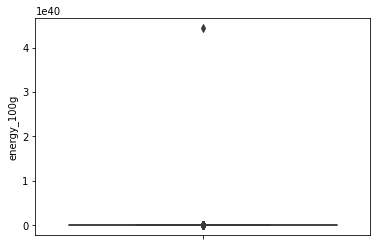

128.225


In [32]:
sns.boxplot(y='energy_100g',palette=["m", "g"],
            data=df5)
plt.show()
print(df4['carbohydrates_100g'].describe()[6]+1.5*(df4['carbohydrates_100g'].describe()[6]-df4['carbohydrates_100g'].describe()[4]))



In [33]:
# on supprime les lignes qui ont des outliers sur energy_100g

df5=df5[df5['energy_100g']<100000]
df5['energy_100g'].describe()


# on supprime les lignes qui ont des outliers sur energy-kcal_100g
df5['energy-kcal_100g'].describe()
df5=df5[df5['energy-kcal_100g']<5000]


# Puis tous les autres si sup à 100
df5=df5[df5['fat_100g']<=100]
df5=df5[df5['carbohydrates_100g']<=100]
df5=df5[df5['proteins_100g']<=100]
df5=df5[df5['sodium_100g']<=100]
df5=df5[df5['vitamin-a_100g']<=100]
df5=df5[df5['vitamin-c_100g']<=100]
df5=df5[df5['potassium_100g']<=100]
df5=df5[df5['calcium_100g']<=100]
df5=df5[df5['polyunsaturated-fat_100g']<=100]
df5=df5[df5['vitamin-e_100g']<=100]
df5=df5[df5['vitamin-b1_100g']<=100]
df5=df5[df5['vitamin-b2_100g']<=100]
df5=df5[df5['vitamin-b6_100g']<=100]
df5=df5[df5['vitamin-b12_100g']<=100]
df5=df5[df5['magnesium_100g']<=100]
df5=df5[df5['saturated-fat_100g']<=100]
df5=df5[df5['fiber_100g']<=100]



list_col_enlever = ['fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'sodium_100g', 
                    'vitamin-a_100g', 'vitamin-c_100g', 'potassium_100g', 'calcium_100g', 'polyunsaturated-fat_100g', 
                    'vitamin-e_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-b6_100g', 'vitamin-b12_100g', 'magnesium_100g']

#que l'on peut faire avec une boucle for..


In [34]:
df5.shape

(813032, 52)

In [35]:
df5['energy_100g'].describe()

count    813032.000000
mean       1140.735783
std         823.419459
min           0.000000
25%         418.000000
50%        1079.000000
75%        1674.000000
max       31246.000000
Name: energy_100g, dtype: float64

In [36]:
df5['nutriscore_score'].describe()

# il reste potentiellement encore des outliers. On va tracer les boxplots pour mieux comprendre :

count    664786.000000
mean          9.105150
std           8.876215
min         -15.000000
25%           1.000000
50%          10.000000
75%          16.000000
max          40.000000
Name: nutriscore_score, dtype: float64

# Retour à la Gestion des doublons :

In [37]:
df5['product_brand'].value_counts().head(20)

Filet de poulet, La Nouvelle Agriculture           210
Filets de poulet, La Nouvelle Agriculture          127
Aiguillettes de poulet, La Nouvelle Agriculture    105
Filets de poulet rôti, Le Gaulois                  104
Les milanaises, Le Gaulois                          88
Jamón serrano, Bonarea                              82
Cuisses de poulet rôti, Le Gaulois                  82
Emmental, Eco+                                      77
Cuisses de poulet, La Nouvelle Agriculture          65
Jamón cocido al horno, Bonarea                      63
Filets de poulet roti, Le Gaulois                   63
Coca-Cola, Coca-Cola                                55
Comté, Le Berger Comtois                            54
Burger vegetariana, Bonarea                         54
Jamón serrano familiar, Bonarea                     53
Fuet extra con pavo, Bonarea                        52
Jambon à l'ancienne, Tallec                         52
Fuet extra, Bonarea                                 51
Comté, Jur

In [38]:
df5[df5['product_brand']=='Comté, Le Berger Comtois'].describe()

,Ancien_Index,nutriscore_score,ecoscore_score_fr,nutrition-score-fr_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,sodium_100g,fiber_100g,vitamin-a_100g,vitamin-c_100g,potassium_100g,calcium_100g,polyunsaturated-fat_100g,vitamin-e_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-b6_100g,vitamin-b12_100g,magnesium_100g
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.0,54.000000,54.0,54.000000,54.0,54.000000,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0,54.0
mean,543790.722222,13.481481,34.259259,13.481481,422.037037,1798.703704,35.0,23.074074,1.0,0.981481,27.0,0.488889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,12142.454465,1.690604,1.389790,1.690604,58.515588,2.177324,0.0,0.381252,0.0,0.136083,0.0,0.666012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,542062.000000,13.000000,34.000000,13.000000,0.000000,1783.000000,35.0,23.000000,1.0,0.000000,27.0,0.320000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,542091.750000,13.000000,34.000000,13.000000,430.000000,1799.000000,35.0,23.000000,1.0,1.000000,27.0,0.320000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,542134.500000,13.000000,34.000000,13.000000,430.000000,1799.000000,35.0,23.000000,1.0,1.000000,27.0,0.320000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,542192.500000,13.000000,34.000000,13.000000,430.000000,1799.000000,35.0,23.000000,1.0,1.000000,27.0,0.320000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,631366.000000,20.000000,43.000000,20.000000,430.000000,1799.000000,35.0,25.000000,1.0,1.000000,27.0,3.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
df5.columns

Index(['Ancien_Index', 'code', 'url', 'product_name', 'product_brand', 'generic_name', 'quantity', 'brands', 'categories', 'manufacturing_places', 'labels', 'emb_codes', 'purchase_places', 'stores', 'countries', 'ingredients_text', 'allergens', 'traces_tags', 'serving_size', 'nutriscore_score', 'nutriscore_grade', 'pnns_groups_1', 'pnns_groups_2', 'states', 'brand_owner', 'ecoscore_score_fr', 'ecoscore_grade_fr', 'main_category', 'image_url', 'image_ingredients_url', 'image_nutrition_url', 'nutrition-score-fr_100g', 'energy-kcal_100g', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'sodium_100g', 'fiber_100g', 'vitamin-a_100g', 'vitamin-c_100g', 'potassium_100g', 'calcium_100g', 'polyunsaturated-fat_100g', 'vitamin-e_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-b6_100g', 'vitamin-b12_100g', 'magnesium_100g'], dtype='object')

In [40]:
d2 = {'Ancien_Index':'first',
      'code':'first',
    'url':'first',
 'product_name':'first',
 'generic_name':'first',
 'quantity':'first',
 'brands':'first',
 'categories':'first',
 'manufacturing_places':'first',
 'labels':'first',
 'emb_codes':'first',
 'purchase_places':'first',
 'stores':'first',
 'countries':'first',
 'ingredients_text':'first',
 'allergens':'first',
 'traces_tags':'first',
 'serving_size':'first',
 'nutriscore_score':'median',
 'nutriscore_grade':'first',
'pnns_groups_1':'first',
'pnns_groups_2':'first',
'states':'first',
 'brand_owner':'first',
 'ecoscore_score_fr':'median',
 'ecoscore_grade_fr':'first',
 'main_category':'first',
 'image_url':'first',
 'image_ingredients_url':'first',
 'image_nutrition_url':'first',
 'energy-kcal_100g':'median',
 'energy_100g':'median',
 'fat_100g':'median',
      'saturated-fat_100g':'median',
 'carbohydrates_100g':'median',
 'sugars_100g':'median',
 'fiber_100g':'median',
      'proteins_100g':'median',
 'sodium_100g':'median',
 'vitamin-a_100g':'median',
 'vitamin-c_100g':'median',
 'potassium_100g':'median',
 'calcium_100g':'median',
 'nutrition-score-fr_100g':'median',
 'polyunsaturated-fat_100g':'median',
 'vitamin-e_100g':'median',
 'vitamin-b1_100g':'median',
 'vitamin-b2_100g':'median',
 'vitamin-b6_100g':'median',
 'vitamin-b12_100g':'median',
 'magnesium_100g':'median'}

df6 = (df5.groupby(['product_brand'], sort=False, as_index=False).agg(d2).reindex(columns=df5.columns))

# possible bug dû aux individus de base (dans d5) unique qui ont des Nan dans leur features

In [41]:
from numpy.random import default_rng

rng = default_rng()
numbers = rng.choice(566559, size=10, replace=False)

numbers

array([306763, 492098, 123365, 451892, 347762, 221554, 214131,  24797,
       389196, 297025], dtype=int64)

In [42]:
df6.rename(columns={'vitamin-a_100g':'vitamin_a_100g'},inplace=True)
df6.rename(columns={'vitamin-c_100g':'vitamin_c_100g'},inplace=True)
df6.rename(columns={'nutrition-score-fr_100g':'nutrition_score_fr_100g'},inplace=True)
df6.rename(columns={'polyunsaturated-fat_100g':'polyunsaturated_fat_100g'},inplace=True)
df6.rename(columns={'vitamin-e_100g':'vitamin_e_100g'},inplace=True)
df6.rename(columns={'vitamin-b1_100g':'vitamin_b1_100g'},inplace=True)
df6.rename(columns={'vitamin-b2_100g':'vitamin_b2_100g'},inplace=True)
df6.rename(columns={'vitamin-b6_100g':'vitamin_b6_100g'},inplace=True)
df6.rename(columns={'vitamin-b12_100g':'vitamin_b12_100g'},inplace=True)
df6.rename(columns={'saturated-fat_100g':'saturated_fat_100g'},inplace=True)


list(df6.columns)
# Modèle initial (error : 22%):

#list_x=['vitamin_a_100g',
# 'vitamin_c_100g',
# 'potassium_100g',
# 'calcium_100g',
# 'nutrition_score_fr_100g',
# 'polyunsaturated_fat_100g',
# 'vitamin_e_100g',
# 'vitamin_b1_100g',
# 'vitamin_b2_100g',
# 'vitamin_b6_100g',
# 'vitamin_b12_100g',
# 'magnesium_100g']




df6.columns
df6.shape[0]

561563

In [43]:
df6.isna().sum()
df6['countries'].value_counts()

France                            200261
United States                     153828
España                             26218
Deutschland                        15053
en:Germany                          8555
                                   ...  
en:mm                                  1
Francia,Luxemburgo, en:belgium         1
Bangladesh, en:mauritius               1
Mexiko, en:de                          1
Francia,Espa�a                         1
Name: countries, Length: 7810, dtype: int64

In [44]:
df6.to_csv('en_openfoodfacts_org_products_V6.csv')